# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np


from sklearn    import datasets as ds
from sklearn    import cluster  as ct
from matplotlib import pyplot   as plt
from sklearn    import metrics    as mt




# 1.0 Loanding Dataset
##   Synthetic clustering dataset

In [2]:
random_state = 0 # 

X, y = ds.make_blobs( # Vai me retorna o valor de x e de y , qunado execultado tras vl ,
                     n_samples=100, #  qtd de amostra que qro nesse 
                      n_features=2, # qtd de fectures
                      centers=4, # 2 clustres natural, inf que  na vida real nao temos aqui eu forco a ter 
                      cluster_std= [0.2, 0.2, 0.6, 0.2], # q é o meu desvio padrao é o quao largo eu quero meu cluster,cada valor diz a lagura do cluster
                      random_state=random_state # parametro de 0 
                      )


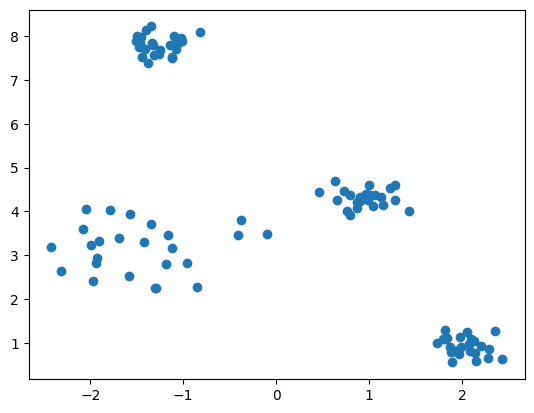

In [3]:
plt.scatter( X[:,0], X[:,1])#, c=y ) # Plotar um grafico de pontos, pegando todas as linhas da primeira col e indo contra todas as linhas da segunda col

# Training the cluster

In [4]:
import sklearn.cluster as ct

n_clusters = 2

kmeans = ct.KMeans(
            n_clusters=n_clusters,    # Definindo o número de clusters como 4
            init='random',
            n_init=10,
            random_state=0 )

# fit ( Treinamento )
labels = kmeans.fit_predict( X )  # Usando fit_predict para treinar e obter rótulos de cluster

# Performace ( Test )
ss_avg = mt.silhouette_score( X, labels)

print( 'For n_clusters = {} - The Avg SS: {}'.format(n_clusters, ss_avg))



For n_clusters = 2 - The Avg SS: 0.6122037187591585


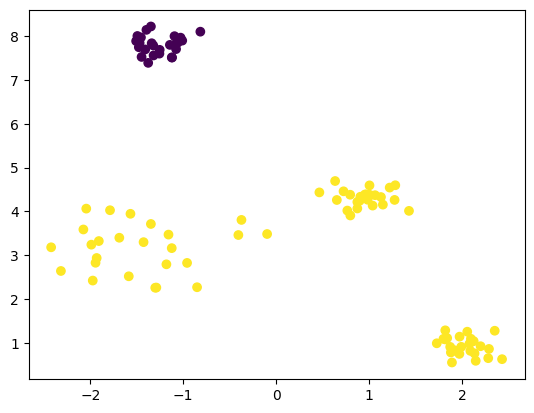

In [5]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

# 3.0 Fine Tuning

In [6]:
n_clusters = np.arange( 2, 11, 1)
ss_list = []

for c in n_clusters:
    kmeans = ct.KMeans(
                n_clusters=c,    # Definindo o número de clusters como 4
                init='random',
                n_init=10,
                random_state=0 )

    # fit ( Treinamento )
    labels = kmeans.fit_predict( X )  # Usando fit_predict para treinar e obter rótulos de cluster

    # Performace ( Test )
    ss_avg = mt.silhouette_score( X, labels)
    ss_list.append( ss_avg )

    print( 'For n_clusters = {} - The Avg SS: {}'.format( c, ss_avg ) )


For n_clusters = 2 - The Avg SS: 0.6122037187591585
For n_clusters = 3 - The Avg SS: 0.7242078792159709
For n_clusters = 4 - The Avg SS: 0.8118161659072985
For n_clusters = 5 - The Avg SS: 0.735285536419559
For n_clusters = 6 - The Avg SS: 0.7385816347868014
For n_clusters = 7 - The Avg SS: 0.6004337610936148
For n_clusters = 8 - The Avg SS: 0.5793248834704261
For n_clusters = 9 - The Avg SS: 0.6163469890721432
For n_clusters = 10 - The Avg SS: 0.4916982470952327


Text(0, 0.5, 'Silhouette Score Average')

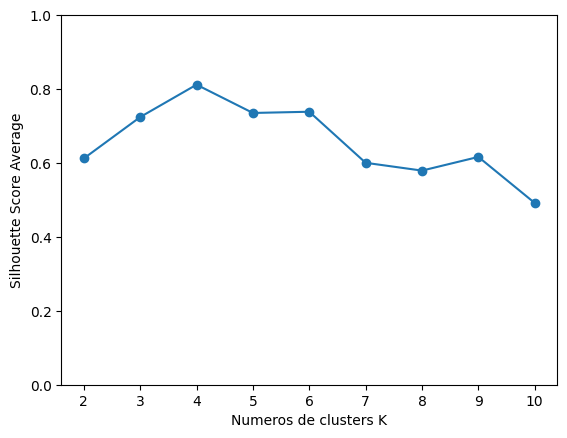

In [8]:
plt.plot( n_clusters, ss_list, marker='o')
plt.ylim( [0, 1] )
plt.xlabel('Numeros de clusters K')
plt.ylabel('Silhouette Score Average')


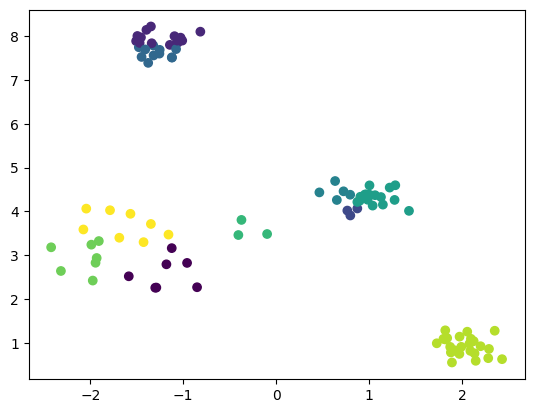

In [9]:
plt.scatter( X[:, 0], X[:, 1], c=kmeans.labels_ )

# 4.0 Algoritimo em producao

For n_clusters = 2 - The Avg SS: 0.6122037187591585
For n_clusters = 3 - The Avg SS: 0.7242078792159709
For n_clusters = 4 - The Avg SS: 0.8118161659072985
For n_clusters = 5 - The Avg SS: 0.735285536419559
For n_clusters = 6 - The Avg SS: 0.7385816347868014
For n_clusters = 7 - The Avg SS: 0.6004337610936148
For n_clusters = 8 - The Avg SS: 0.5793248834704261
For n_clusters = 9 - The Avg SS: 0.6163469890721432
For n_clusters = 10 - The Avg SS: 0.4916982470952327


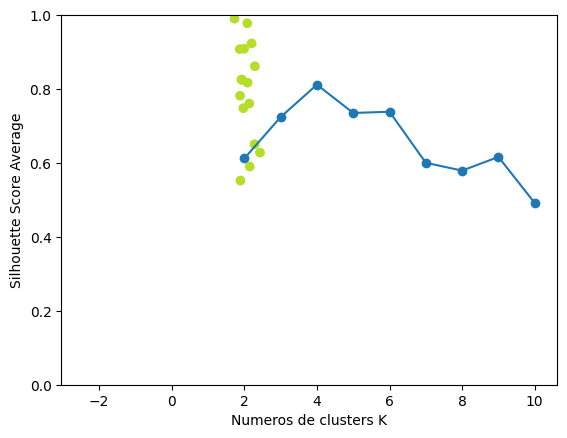

In [7]:
n_clusters = np.arange( 2, 11, 1)
ss_list = []

for c in n_clusters:
    kmeans = ct.KMeans(
                n_clusters=c,    # Definindo o número de clusters como 4
                init='random',
                n_init=10,
                random_state=0 )

    # fit ( Treinamento )
    labels = kmeans.fit_predict( X )  # Usando fit_predict para treinar e obter rótulos de cluster

    # Performace ( Test )
    ss_avg = mt.silhouette_score( X, labels)
    ss_list.append( ss_avg )

    print( 'For n_clusters = {} - The Avg SS: {}'.format( c, ss_avg ) )


plt.plot( n_clusters, ss_list, marker='o')
plt.ylim( [0, 1] )
plt.xlabel('Numeros de clusters K')
plt.ylabel('Silhouette Score Average')


plt.scatter( X[:, 0], X[:, 1], c=kmeans.labels_ )


In [ ]:
centroids = kmeans.cluster_centers_


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)  # Plota os centróides em vermelho
